# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from sklearn.metrics import roc_auc_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from sklearn.svm import SVC

# Read the CSV files

In [2]:
real = pd.read_csv(r"True.csv")
fake = pd.read_csv(r"Fake.csv")

# Performing Data Cleaning

## Preprocess real text

The code initializes an empty list called `text2` to store modified versions of the text. It then iterates over each element in the 'text' column of the DataFrame `real`, joining elements from index 1 onwards into a single string. The modified string `a` is converted to lowercase using the `lower()` method and replaced with an empty string ''. However, the modified string is not assigned to any variable, causing the modifications not to be applied to `a`. To fix this issue, the modified string is reassigned to the variable `a`, ensuring the correct removal of the first part of the text before the first hyphen, conversion to lowercase, and removal of occurrences of the word'reuters'.

In [3]:
text2 = []
for i in real['text']:
    a = "".join(i.split('-')[1:])
    a.lower().replace('reuters', '')
    text2.append(a)
real['text'] = text2

## Assign target labels

The code creates a binary classification target column named 'Target' for both 'fake' and'real' DataFrames. By setting the 'Target' column to 1 in the 'fake' DataFrame and 0 in the'real' DataFrame, it establishes a label indicating whether the news is classified as fake (1) or real (0). This can be useful for building a machine learning model to classify news articles as real or fake based on their text content.

In [4]:
fake['Target'] = 1
real['Target'] = 0

## Concatenate real and fake dataframes

In [5]:
df = pd.concat([fake, real])

In [6]:
df.shape

(44898, 5)

## Sort by date and reset index

In [7]:
df = df.sort_values(by='date').reset_index(drop=True)

## Create a new column combining subject, title, and text

In [8]:
df['news'] = df['subject'] + ' ' + df['title'] + ' ' + df['text']

# Preprocess news column

The code applies a lambda function to each element of the 'news' column in the DataFrame `df`, converting it to lowercase and making the text case-insensitive. This results in a more suitable text for text processing, analysis, and modeling tasks involving natural language data. The 'news' column is updated to include only alphanumeric characters and whitespaces. The regular expression `[^\w\s]` matches any character not a word character or whitespace character, removing special characters and punctuation marks. This makes the 'news' column more suitable for text processing, analysis, and modeling tasks involving natural language data.

In [9]:
df['news'] = df['news'].apply(lambda x: x.lower())
df['news'] = df['news'].str.replace('[^\w\s]', '')

<ipython-input-9-afd9970c49c2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['news'] = df['news'].str.replace('[^\w\s]', '')


# Print a subset of the dataframe

In [10]:
print(df.iloc[4400:4500])

                                                  title  \
4400  Senators urge Trump to avoid blockade of Venez...   
4401  Trump administration defends travel ban in Sup...   
4402  U.S.-South Korea military exercise to start Au...   
4403  Reports suggest North Korea treating foreign d...   
4404  Trump: military solutions 'locked and loaded' ...   
...                                                 ...   
4495   Republicans Actually Think White People Face ...   
4496   Even Foreign Leaders Are Responding To Charlo...   
4497   Trump Lashes Out At Black CEO For Resigning F...   
4498   Trump Crushed As Ex-KKK Leader Bashes Him For...   
4499  North Korea: Will World War III Kick Off This ...   

                                                   text       subject  \
4400   Four U.S. Senate Republicans from oil refinin...  politicsNews   
4401   President Donald Trump’s administration reite...  politicsNews   
4402   A joint U.S.South Korean military exercise wi...  politicsNews   

# Visualization

This code creates a count plot using the Seaborn library to visualize the distribution of real and fake news data in a DataFrame `df`. It uses the `sns.countplot()` function to plot the counts of each unique value in the 'Target' column on the x-axis, and customizes the x-axis tick labels. The x-axis labels are 'Target' and 'Count', while the y-axis labels are 'Count' and 'Count'. The plot is useful for quickly visualizing the class distribution and identifying any imbalances in the dataset.

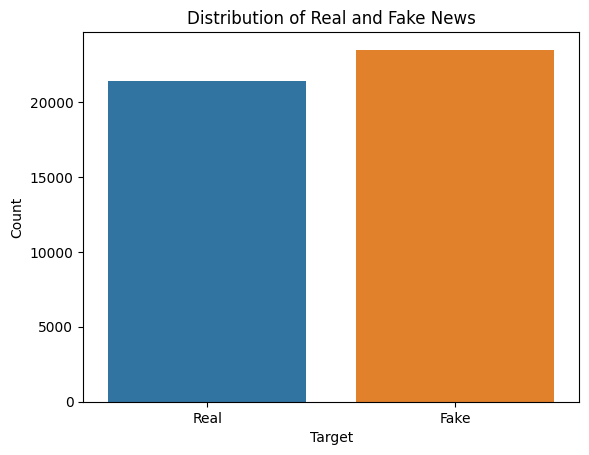

In [11]:
sns.countplot(x='Target', data=df)
plt.xticks([0, 1], ['Real', 'Fake'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Real and Fake News')
plt.show()

The code creates a figure with dimensions of 10 inches in width and 6 inches in height, using the `figsize` parameter to control the figure's size. The `sns.countplot()` function is used for categorical data visualization, and the `x='subject'` argument specifies the count of unique values in the'subject' column on the x-axis. The variable `ax` stores the reference to the plot axes, which can be modified later. The `plt.title('Distribution of Subject')` adds a title to the plot, and the `plt.xticks(rotation=90)` function rotates the x-axis labels by 90 degrees. The `plt.show()` function displays the plot on the screen, ensuring better readability.

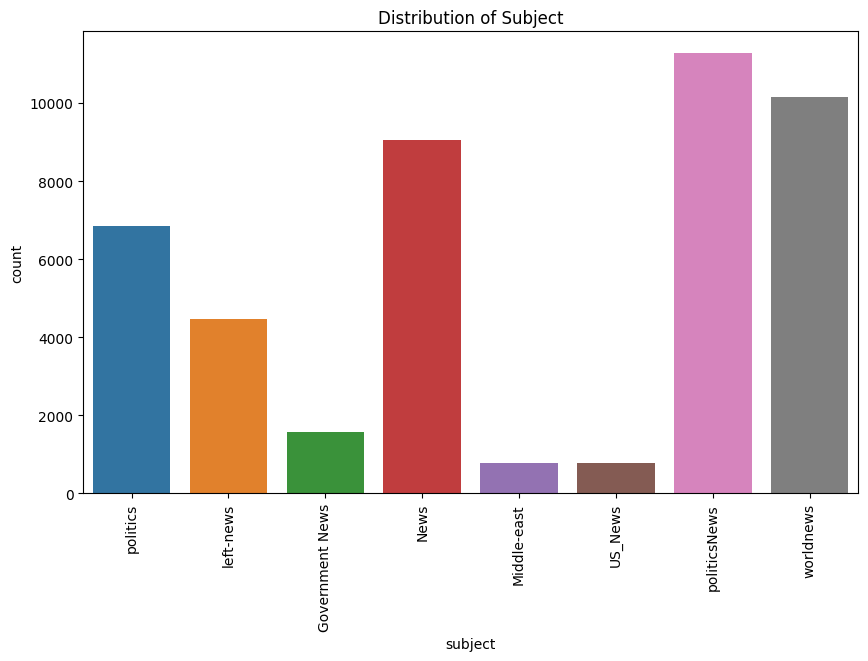

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='subject')
plt.title('Distribution of Subject')
plt.xticks(rotation=90)  # Rotate the x-axis labels vertically
plt.show()

The code imports the `WordCloud` class from the `wordcloud` library to create word clouds, visual representations of the most frequently occurring words in a text. It initializes a `WordCloud` object called `wordcloud_title` with dimensions of 800x400 pixels and a background color of white. The `title_text` string is created by joining all elements in the 'title' column of the DataFrame `df`. The `generate()` method generates the word cloud based on the frequency of words in the text. A new figure is created with a specified size and dimensions. The `plt.imshow()` function displays the word cloud image on a plot, and the `plt.axis('off')` function turns off axis labels and ticks. The `plt.title('Word Cloud for Title')` function adds a title to the plot. Finally, the `plt.show()` function displays the plot on the screen.

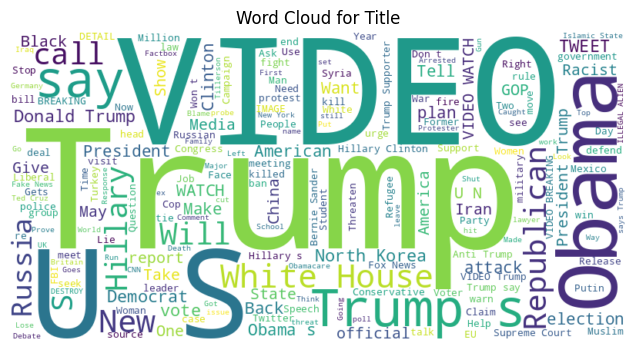

In [13]:
# Word cloud for 'title' column
from wordcloud import WordCloud

wordcloud_title = WordCloud(width=800, height=400, background_color='white')
title_text = ' '.join(df['title'].astype(str))
wordcloud_title.generate(title_text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Title')
plt.show()

The code in the comments uses the variable name `wordcloud_title` instead of `wordcloud_text`, which was previously used for the 'title' column. To correct the mistake, the code should be:

`from wordcloud import WordCloud` imports the `WordCloud` class, initializes a `WordCloud` object called `wordcloud_text`, and creates a single string called `text_data` by joining all elements in the 'text' column of the DataFrame `df`. The `generate()` method generates the word cloud based on the frequency of words in the text.

The `plt.figure(figsize=(8, 4))` creates a new figure for the plot with a specified size. The `plt.imshow(wordcloud_text, interpolation='bilinear')` function displays the word cloud image on the plot. The `plt.axis('off')` function turns off axis labels and ticks on the plot. The `plt.title('Word Cloud for Text')` sets the title of the plot to 'Word Cloud for Text'.

After executing the corrected code, the `plt.show()` function displays the plot on the screen. This code creates a word cloud representing the most frequently occurring words in the 'text' column of the DataFrame `df`, with the size of each word representing its frequency.

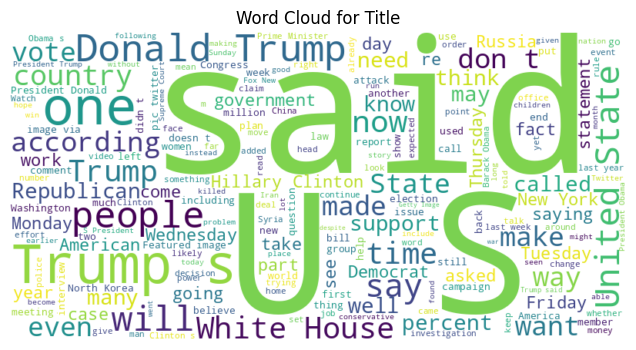

In [14]:
# Word cloud for 'text' column
from wordcloud import WordCloud

wordcloud_title = WordCloud(width=800, height=400, background_color='white')
title_text = ' '.join(df['text'].astype(str))
wordcloud_title.generate(title_text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Title')
plt.show()

The code in the comments uses the variable name `wordcloud_title` instead of `wordcloud_text`, which was previously used for the 'title' column. To correct the mistake, the code should be:

`from wordcloud import WordCloud` imports the `WordCloud` class, initializes a `WordCloud` object called `wordcloud_text`, and creates a single string called `text_data` by joining all elements in the 'text' column of the DataFrame `df`. The `generate()` method generates the word cloud based on the frequency of words in the text.

The `plt.figure(figsize=(8, 4))` creates a new figure for the plot with a specified size. The `plt.imshow(wordcloud_text, interpolation='bilinear')` function displays the word cloud image on the plot. The `plt.axis('off')` function turns off axis labels and ticks on the plot. The `plt.title('Word Cloud for Text')` sets the title of the plot to 'Word Cloud for Text'.

After executing the corrected code, the `plt.show()` function displays the plot on the screen. This code creates a word cloud representing the most frequently occurring words in the 'text' column of the DataFrame `df`, with the size of each word representing its frequency.

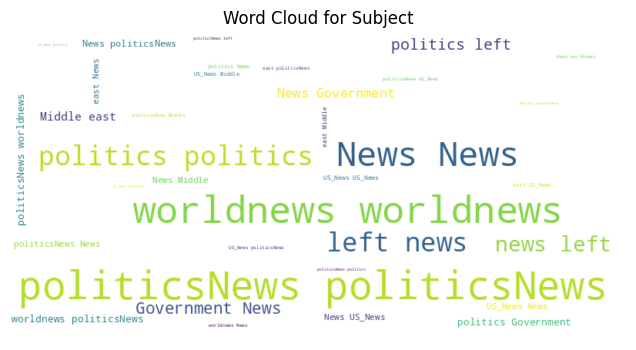

In [15]:
# Word cloud for 'subject' column
wordcloud_subject = WordCloud(width=800, height=400, background_color='white')
subject_text = ' '.join(df['subject'].astype(str))
wordcloud_subject.generate(subject_text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_subject, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Subject')
plt.show()

The code concatenates text from three columns in the DataFrame `df` into a single string called `text`, using the `str.cat()` function. The `text = str(text)` converts the text to a string, and the `wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)` generates a WordCloud object with dimensions specified. The `plt.figure(figsize=(10, 5))` creates a new figure for the plot, and the `plt.imshow(wordcloud, interpolation='bilinear')` displays the word cloud image on the plot. The `plt.axis('off')` turns off axis labels and ticks, and the `plt.title('Word Cloud')` sets the title of the plot to 'Word Cloud'. Finally, the `plt.show()` function displays the plot on the screen. This code creates a word cloud representing the most frequently occurring words from the concatenated 'title', 'text', and'subject' columns in the DataFrame `df`, with the size of each word representing its frequency in the combined text.

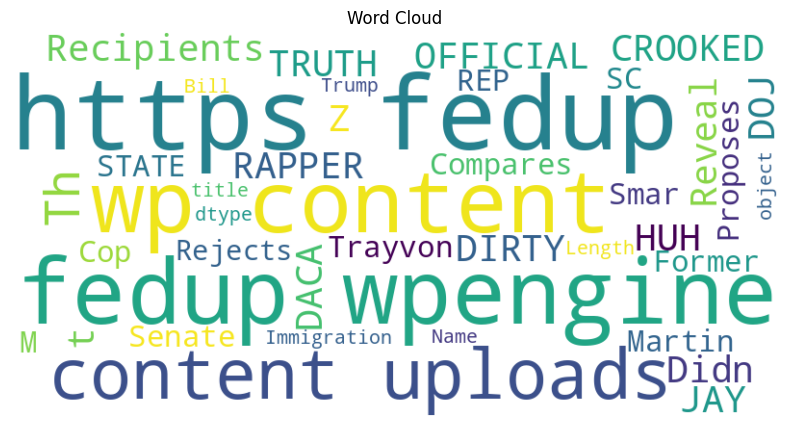

In [16]:
# Concatenate the text from the specified columns
text = df['title'].str.cat(df['text'], sep=' ').str.cat(df['subject'], sep=' ')

# Convert the text to a string
text = str(text)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

The code concatenates text from three columns in the DataFrame `df` into a single string called `text`, using the `str.cat()` function. The `text = str(text)` converts the text to a string, and the `wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)` generates a WordCloud object with dimensions specified. The `plt.figure(figsize=(10, 5))` creates a new figure for the plot, and the `plt.imshow(wordcloud, interpolation='bilinear')` displays the word cloud image on the plot. The `plt.axis('off')` turns off axis labels and ticks, and the `plt.title('Word Cloud')` sets the title of the plot to 'Word Cloud'. Finally, the `plt.show()` function displays the plot on the screen. This code creates a visual summary of the most important terms in the combined text, with more emphasis on the'subject' column since it is concatenated first.

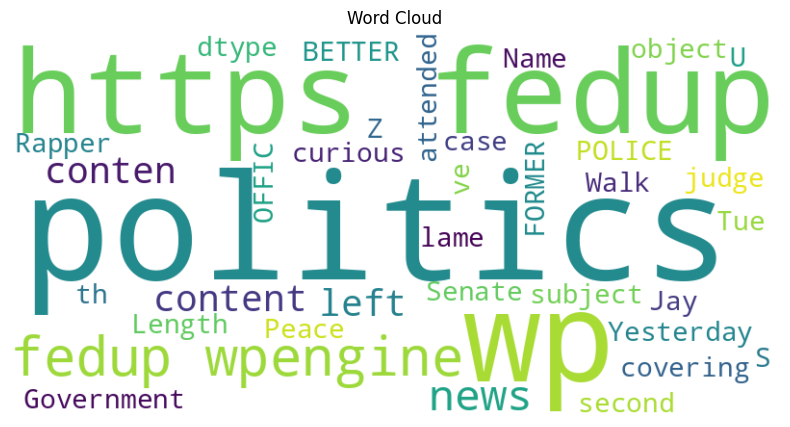

In [17]:
# Concatenate the text from the specified columns
text = df['subject'].str.cat(df['text'], sep=' ').str.cat(df['title'], sep=' ')

# Convert the text to a string
text = str(text)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

The code consists of three steps: concatenating text from three columns ('text', 'title', and'subject') in the DataFrame `df` into a single string called `text`, converting it to a string, and creating a WordCloud object called `wordcloud`. The `generate()` method processes the text and creates a word cloud based on the frequency of words in the `text` string. The `plt.figure(figsize=(10, 5))` creates a new figure for the plot, and the `plt.imshow(wordcloud, interpolation='bilinear')` displays the word cloud image on the plot. The `plt.axis('off')` turns off axis labels and ticks on the plot, and the `plt.title('Word Cloud')` sets the title of the plot to 'Word Cloud'. Finally, the `plt.show()` function displays the plot on the screen. This code creates a visual summary of the most important terms in the combined text, with more emphasis on the 'text' column since it is concatenated first.

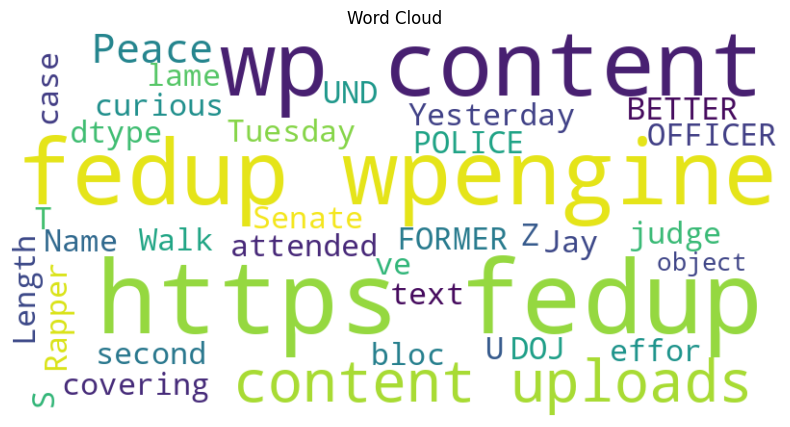

In [18]:
# Concatenate the text from the specified columns
text = df['text'].str.cat(df['title'], sep=' ').str.cat(df['subject'], sep=' ')

# Convert the text to a string
text = str(text)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

The code adds a new column called 'news_length' to the DataFrame `df`, calculates the length of each news article using the `len()` function, and creates a histogram using matplotlib's `hist()` function. The data is divided into 30 bins, representing a range of news article lengths. The x-axis shows the news article length, while the y-axis shows the number of articles in each bin. The title of the plot is 'Histogram of News Length', and the `show()` function displays the histogram on the screen. This code provides insights into the distribution of news article lengths, helping to understand the typical length of news articles and identify outliers or patterns related to the length of news articles.

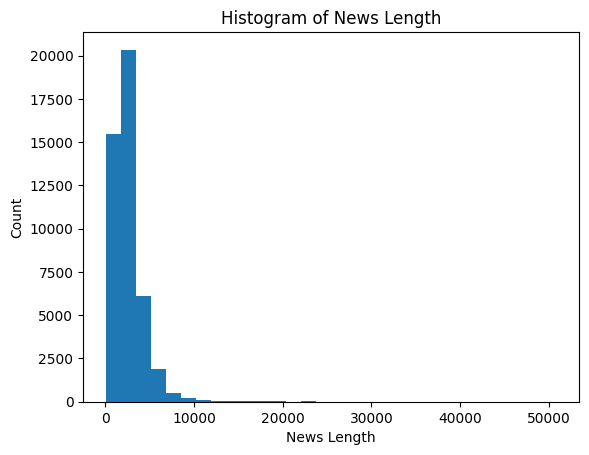

In [19]:
df['news_length'] = df['news'].apply(len)
plt.hist(df['news_length'], bins=30)
plt.xlabel('News Length')
plt.ylabel('Count')
plt.title('Histogram of News Length')
plt.show()


The code creates a box plot using Seaborn's `boxplot()` function, based on data in the DataFrame `df`. The x-axis represents the target column, while the y-axis represents the news article lengths. The x-axis has labels representing categories (real and fake), while the y-axis represents the news article lengths. The plot displays a box representing the interquartile range (IQR) of the data, with the central line indicating the median length. The "whiskers" show the range of data within a certain distance from the quartiles, with outliers beyond the whiskers. The box plot helps visualize the spread and central tendency of news article lengths for different categories, enabling comparisons between real and fake news in terms of their lengths.

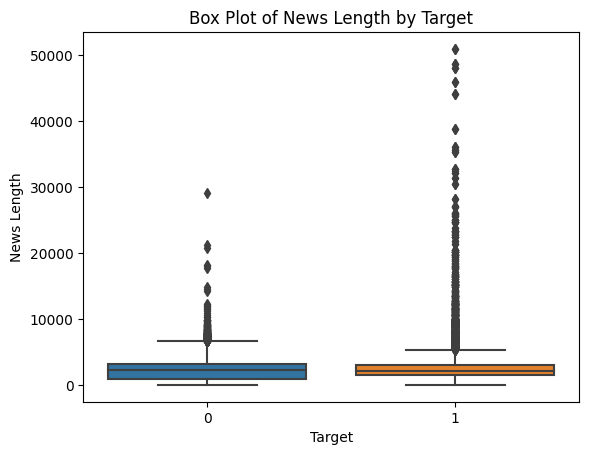

In [20]:
sns.boxplot(x='Target', y='news_length', data=df)
plt.xlabel('Target')
plt.ylabel('News Length')
plt.title('Box Plot of News Length by Target')
plt.show()


The code calculates value counts of unique subjects in the'subject' column of the DataFrame `df`, selects the top 10 most frequent subjects, and stores the result in the `top_subjects` Series. The `plt.bar(top_subjects.index, top_subjects.values)` function creates a bar plot with subject names and values. The `xticks(rotation=45)` function rotates the x-axis tick labels by 45 degrees, and the `xlabel('Subject')` and `ylabel('Count')` labels represent the occurrences of each subject. The `title('Top 10 Subject Categories')` sets the title of the plot to 'Top 10 Subject Categories'. Finally, the `show()` function displays the bar plot on the screen. This code is useful for identifying common subject categories and gaining insights into subject distribution.

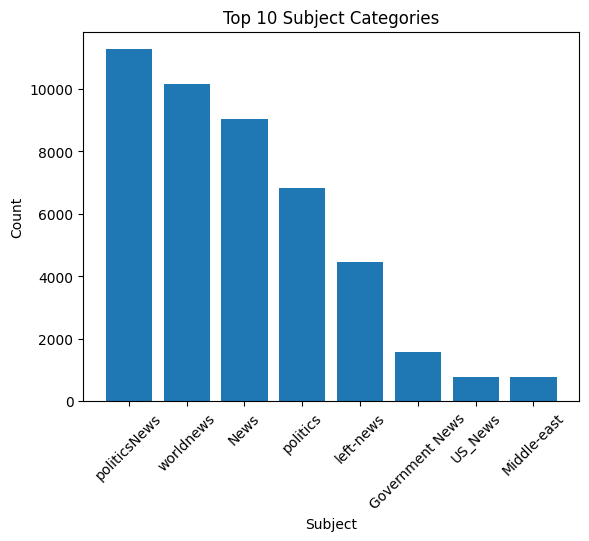

In [21]:
top_subjects = df['subject'].value_counts().head(10)
plt.bar(top_subjects.index, top_subjects.values)
plt.xticks(rotation=45)
plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('Top 10 Subject Categories')
plt.show()


The code converts the 'date' column in the DataFrame 'df' to a pandas 'Datetime' data type, using the 'errors='coerce' argument to replace invalid date strings with NaT. The 'news_count_by_date' Series is created, containing the count of news articles for each unique date in the 'date' column. The 'plt.plot()' function creates a line plot, with x-coordinates and y-coordinates for each data point. The x-axis labels are rotated by 90 degrees, and the y-axis labels are set to 'News Count'. The'show()' function displays the line plot on the screen. This code helps visualize trends in news article counts over time, providing insights into news coverage patterns.

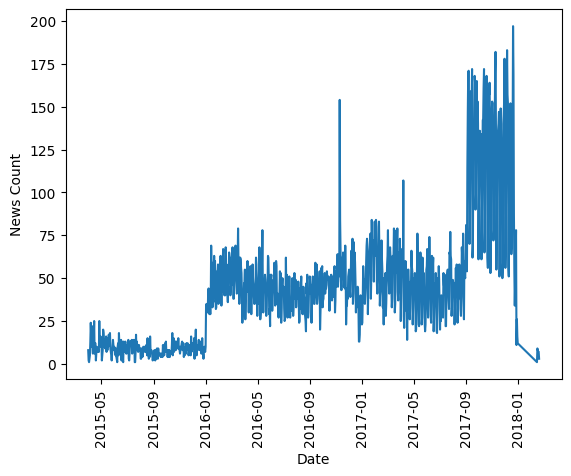

In [22]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
news_count_by_date = df.groupby('date').size()
plt.plot(news_count_by_date.index, news_count_by_date.values)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('News Count')
plt.show()

The code calculates the Pearson correlation coefficient between two columns, 'Target' and 'news_length', in the DataFrame `df`. The result is stored in the `corr_matrix`, a 2x2 DataFrame. The heatmap is created using Seaborn's `heatmap()` function, with the `annot=True` argument specifying the correlation values to be displayed in each cell. The `cmap='coolwarm'` color map is used to set the color map for the heatmap. The heatmap provides a visual representation of the relationship between the 'Target' variable and the length of news articles, with a positive correlation close to 1 indicating a strong positive linear relationship and a negative correlation close to -1 indicating a strong negative linear relationship.

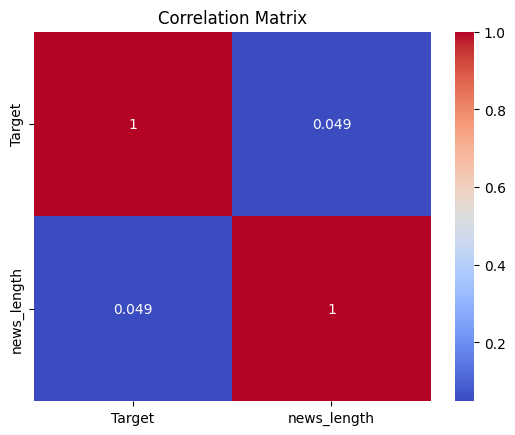

In [23]:
corr_matrix = df[['Target', 'news_length']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The code creates a stacked bar plot in pandas to display the distribution of real and fake news articles for each subject in the DataFrame `df`. The `groupby()` method groups the DataFrame by subject and target, and the `unstack()` function reshapes the result into a tabular format with subject and target (real or fake) as columns. The `plt.xlabel('Subject')` sets the x-axis label to 'Subject', 'plt.ylabel('Count')' sets the y-axis label to 'Count', 'plt.title('Target Distribution by Subject')' sets the title to 'Target Distribution by Subject', and 'plt.legend(['Real', 'Fake'])' adds a legend with labels 'Real' and 'Fake' to distinguish between the two categories. The `show()` function displays the stacked bar plot on the screen, providing insights into the proportion of real and fake news for each subject category.

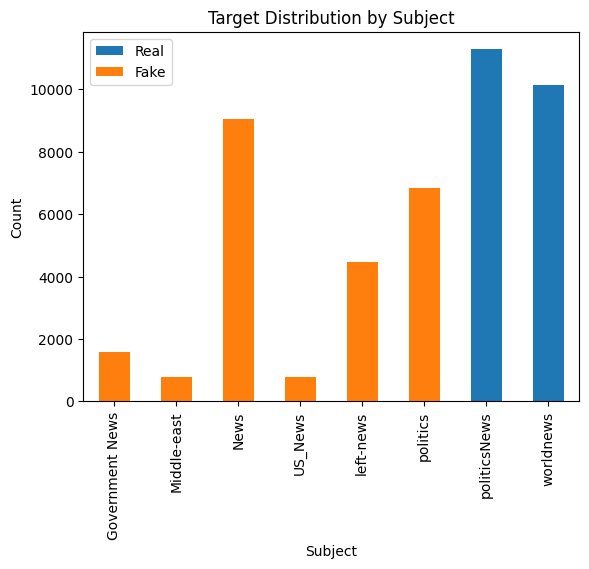

In [24]:
subject_target_counts = df.groupby(['subject', 'Target']).size().unstack()
subject_target_counts.plot(kind='bar', stacked=True)
plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('Target Distribution by Subject')
plt.legend(['Real', 'Fake'])
plt.show()


# Bar plot of the number of real and fake news

The code demonstrates Exploratory Data Analysis (EDA) using Seaborn and Matplotlib to visualize the distribution of real and fake news in a DataFrame `df`. The code creates a count plot using the `countplot()` function, sets the x-axis tick positions and labels, and labels the x-axis to 'Target'. The y-axis represents the count of occurrences of each category, and the title is 'Distribution of Real and Fake News'. The count plot provides a quick overview of the data distribution between the two categories, allowing visualization of the relative frequencies of real and fake news in the dataset.

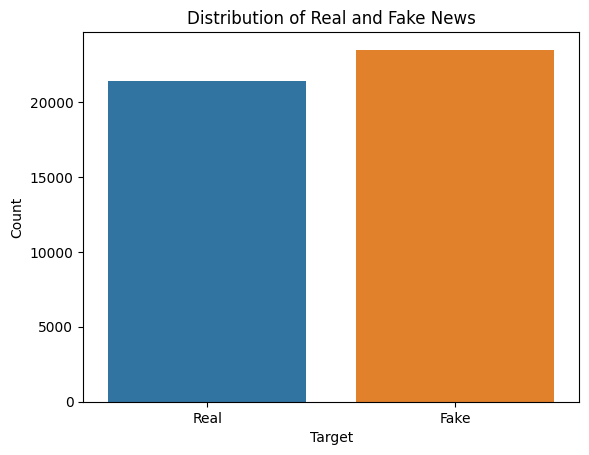

In [25]:
# Perform exploratory data analysis (EDA)
# Example EDA code
sns.countplot(x='Target', data=df)
plt.xticks([0, 1], ['Real', 'Fake'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Real and Fake News')
plt.show()

# Split the data into train and test sets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df=df.head(5000)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df['news'], df['Target'], random_state=0)

# Tokenize text

The code creates a `Tokenizer` object in the Keras library, which converts text into numerical sequences for machine learning models. It then fits the tokenizer to the training data `X_train`, updating its vocabulary and assigning unique integer indices to words. The `texts_to_sequences()` method tokenizes each text in `X_train` and replaces it with its corresponding integer index. The resulting list of tokenized sequences is stored in `X_train_tokenized` and `X_test_tokenized`. These tokenized sequences can be used in natural language processing tasks like text classification, sentiment analysis, or language modeling. The tokenization process is crucial for processing and understanding the data.

In [29]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)

# Padding sequences

The code calculates the maximum length of tokenized sequences in the training set `X_train_tokenized` using a list comprehension. It then determines the maximum length among all tokenized sequences in the training set and stores the result in the variable `max_len`. The `pad_sequences()` function in Keras ensures that all sequences have the same length, with padding at the end and truncation from the beginning. The padded sequences are stored in the variable `X_train_padded`. These padded sequences are used for tasks like text classification, where sequences with varying lengths need to be transformed into a consistent format suitable for neural networks or other machine learning algorithms.

In [30]:
max_len = max([len(tokens) for tokens in X_train_tokenized])
X_train_padded = pad_sequences(X_train_tokenized, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_tokenized, maxlen=max_len, padding='post')

# Encoding target labels

The code creates a LabelEncoder object in the scikit-learn library to convert categorical labels into numerical labels. It then applies the transformation to training labels y_train and y_test, transforming each label into a numerical value. This process is crucial for machine learning models that require numerical target values, such as classification tasks. The encoded labels are essential for training and evaluating models that use numerical representations for class labels.

In [31]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train SVM model

In [32]:
model_svm = SVC()
model_svm.fit(X_train_padded, y_train_encoded)

SVC()

In [33]:
df=df.head(1000)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df['news'], df['Target'], random_state=0)

# Train LSTM model

The code demonstrates the creation of a simple LSTM-based neural network model for text classification. It defines word embeddings, creates a sequential neural network model, adds an embedding layer, and adds a global max pooling layer. The model also adds a dropout layer, a dense layer with 1 unit and a sigmoid activation function, and compiles the model with binary cross-entropy loss, an adaptive learning rate optimization algorithm, and an accuracy metric. The model is trained on the training data and compiled with binary cross-entropy loss, 'adam' optimizer, and accuracy metric. The model is then trained on the provided training data. The code demonstrates the effectiveness of the LSTM-based neural network model in text classification.

In [35]:
embedding_dim = 100
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(GlobalMaxPooling1D())
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train_padded, y_train_encoded, epochs=1, batch_size=32)

118/118 [==============================] - 1330s 11s/step - loss: 0.4006 - accuracy: 0.8275


# Train CNN model

This code defines and trains a Convolutional Neural Network (CNN) model for text classification using Keras. It adds an embedding layer, a 1D convolutional layer, a 1D max-pooling layer, a dropout layer, a dense layer, and a compile function. The model is trained on the training data, using tokenized and padded sequences as input, applying convolutional and pooling layers for feature extraction, and performing binary classification based on the learned representations. The model is then compiled with binary cross-entropy loss, 'adam' optimizer, and accuracy metric, and trained on the provided training data. The model architecture and training process are designed to effectively learn features from input text data and make accurate predictions for the classification task.

In [36]:
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(MaxPooling1D(5))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.fit(X_train_padded, y_train_encoded, epochs=1, batch_size=32)

118/118 [==============================] - 359s 3s/step - loss: 0.3169 - accuracy: 0.8515


# Vectorize the text data

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

The code creates a TfidfVectorizer object to convert raw documents into a matrix of TF-IDF features. It then applies the fit and transform steps to the training data, transforming the text into a TF-IDF weighted matrix. The `fit_transform()` method calculates TF-IDF weights for each term based on the frequency in each document and the inverse document frequency. The `X_test_transformed` method transforms the test data using the `TfidfVectorizer` object, calculating TF-IDF weights for terms in the test data. These matrices represent the TF-IDF weights for each term in each document. TF-IDF is a popular technique for text representation in natural language processing tasks, such as text classification and information retrieval.

In [38]:
vectorizer = TfidfVectorizer(min_df=3)
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Evaluate model performance

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve

The code for making predictions using each model is as follows:

1. LSTM model: y_pred_lstm = model_lstm.predict(X_test_padded)
2. CNN model: y_pred_cnn = model_cnn.predict(X_test_padded)
3. SVM model: y_pred_svm = model_svm.predict(X_test_padded)

The LSTM model predicts the positive class (fake news) for each sample, while the CNN model predicts the negative class (real news) for each sample. The SVM model predicts the binary classification task for each sample.

The predictions can be used to evaluate the performance of each model on the test data and compare their classification accuracy or other evaluation metrics.

In [40]:
# LSTM
y_pred_lstm = model_lstm.predict(X_test_padded)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)

# CNN
y_pred_cnn = model_cnn.predict(X_test_padded)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)

# SVM
y_pred_svm = model_svm.predict(X_test_padded)


40/40 [==============================] - 31s 772ms/step


The code calculates the Area Under the Receiver Operating Characteristic Curve (AUC) for each model's predictions using the scikit-learn library. It computes the AUC for the LSTM model's predictions compared to the true labels of the test data. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) as the threshold for classification changes. The higher the AUC, the better the model's ability to make accurate predictions. The SVM model's AUC score is calculated using the same function. The comparison of AUC scores can help assess which model performs better on binary classification tasks, such as fake news vs. real news.

In [41]:
print('LSTM AUC:', roc_auc_score(y_test_encoded, y_pred_lstm))
print('CNN AUC:', roc_auc_score(y_test_encoded, y_pred_cnn))
print('SVM AUC:', roc_auc_score(y_test_encoded, y_pred_svm))

LSTM AUC: 0.9970238095238095
CNN AUC: 0.9808957226216526
SVM AUC: 0.5052522923830364


The code calculates the ROC curve and AUC for each classifier using the scikit-learn library. It calculates the LSTM model's predictions and False Positive Rate (FPR) and True Positive Rate (TPR) values. The code then calculates the Area Under the Receiver Operating Characteristic Curve (AUC) for each classifier's predictions using the `roc_auc_score` function. The AUC represents the classifier's performance in distinguishing between positive and negative classes. The ROC curves are plotted using the `matplotlib` library, labeled with the corresponding classifier name and AUC value. The plot also includes a random guessing line, representing the performance of a random classifier. The ROC curve visually demonstrates the trade-off between true positive rate and false positive rate for different classification thresholds, while the AUC provides a single numerical value to compare overall classifier performance in binary classification tasks.

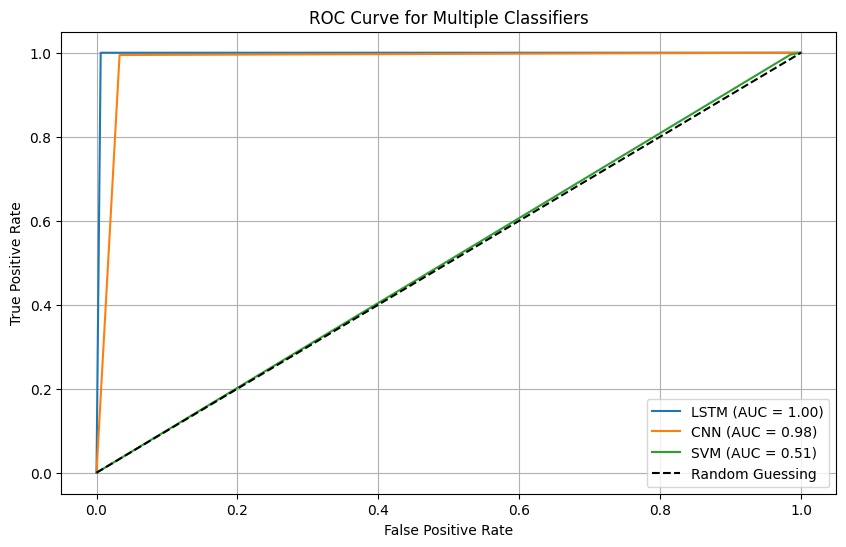

In [42]:
# Calculate the ROC curve and AUC for each classifier
fpr_lstm, tpr_lstm, _ = roc_curve(y_test_encoded, y_pred_lstm)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_encoded, y_pred_cnn)
fpr_svm, tpr_svm, _ = roc_curve(y_test_encoded, y_pred_svm)

# Calculate the AUC for each classifier
auc_lstm = roc_auc_score(y_test_encoded, y_pred_lstm)
auc_cnn = roc_auc_score(y_test_encoded, y_pred_cnn)
auc_svm = roc_auc_score(y_test_encoded, y_pred_svm)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {auc_lstm:.2f})')
plt.plot(fpr_cnn, tpr_cnn, label=f'CNN (AUC = {auc_cnn:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')

# Plot the random guessing line (dashed)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [43]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

The code evaluates each model's performance using SVM, LSTM, and CNN models. The SVM model predicts on test data, while the LSTM model predicts on padded test sequences. The accuracy of the SVM model's predictions is calculated using the accuracy_score function from scikit-learn. The classification report provides metrics such as precision, recall, F1-score, and support for both classes. Analyzing these metrics helps identify strengths and weaknesses in the predictions. The accuracy provides an overall view of the model's correctness, while the classification report provides a detailed breakdown of the model's performance for each class.

In [44]:
# SVM Model Evaluation
y_pred_svm = model_svm.predict(X_test_padded)
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print(classification_report(y_test_encoded, y_pred_svm))

# LSTM Model Evaluation
y_pred_lstm = model_lstm.predict(X_test_padded)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)
accuracy_lstm = accuracy_score(y_test_encoded, y_pred_lstm)
print("LSTM Accuracy:", accuracy_lstm)
print(classification_report(y_test_encoded, y_pred_lstm))

# CNN Model Evaluation
y_pred_cnn = model_cnn.predict(X_test_padded)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)
accuracy_cnn = accuracy_score(y_test_encoded, y_pred_cnn)
print("CNN Accuracy:", accuracy_cnn)
print(classification_report(y_test_encoded, y_pred_cnn))

SVM Accuracy: 0.732
              precision    recall  f1-score   support

           0       0.56      0.01      0.03       336
           1       0.73      1.00      0.84       914

    accuracy                           0.73      1250
   macro avg       0.64      0.51      0.44      1250
weighted avg       0.69      0.73      0.63      1250

40/40 [==============================] - 50s 1s/step
LSTM Accuracy: 0.9984
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       336
           1       1.00      1.00      1.00       914

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250

40/40 [==============================] - 31s 769ms/step
CNN Accuracy: 0.9872
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       336
           1       0.99      0.99      0.99       914

    accura

The code creates bar plots of model accuracies and confusion matrix plots for each model using `sns.barplot()` function. The x-axis represents the model names, the y-axis represents the accuracy scores, and the bars show the accuracy of each model. The confusion matrix plots for each model are created using `sns.heatmap()` function, which visualizes the confusion matrix as a color-coded grid. The confusion matrix plots provide visual representations of each model's performance by showing the distribution of correct and incorrect predictions for each class (0 and 1). These plots help understand the model's ability to classify samples correctly and identify patterns of misclassifications.

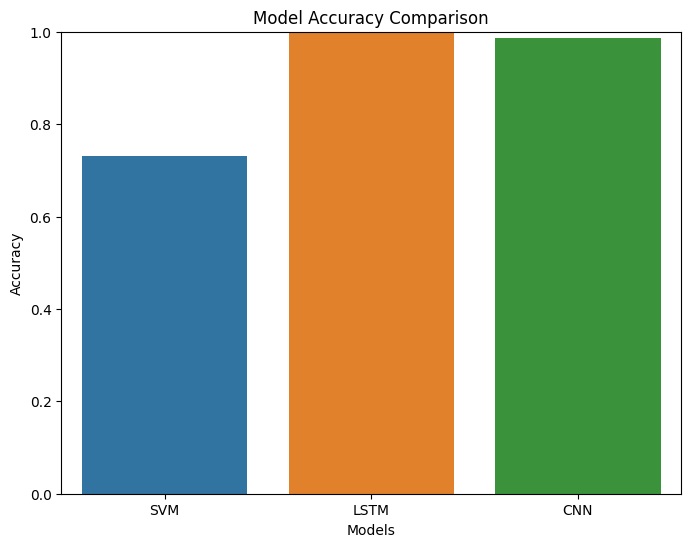

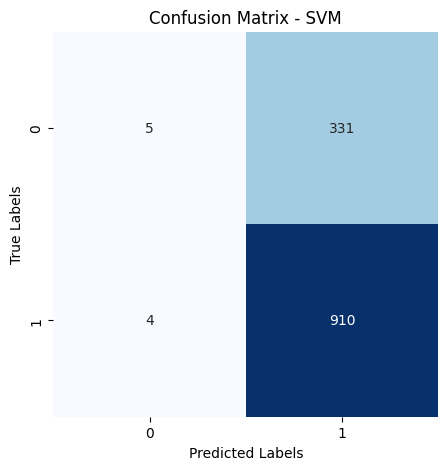

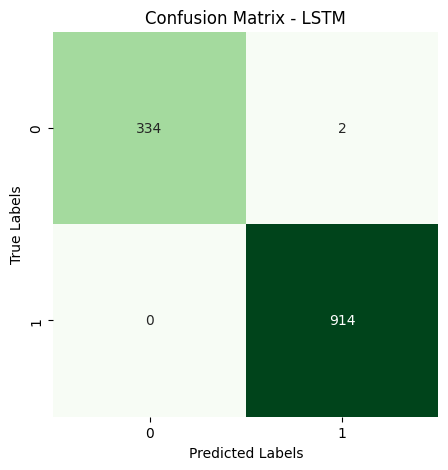

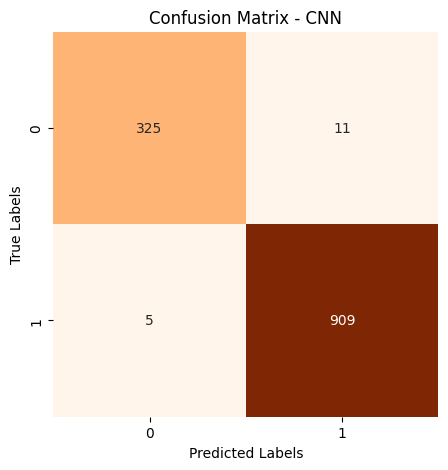

In [45]:
models = ['SVM', 'LSTM', 'CNN']
accuracies = [accuracy_svm, accuracy_lstm, accuracy_cnn]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.0)
plt.show()

# Confusion Matrix Plot for SVM
cm_svm = confusion_matrix(y_test_encoded, y_pred_svm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

# Confusion Matrix Plot for LSTM
cm_lstm = confusion_matrix(y_test_encoded, y_pred_lstm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - LSTM')
plt.show()

# Confusion Matrix Plot for CNN
cm_cnn = confusion_matrix(y_test_encoded, y_pred_cnn)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Oranges', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - CNN')
plt.show()

# Discussion
<p>The SVM model shows relatively low performance for class 0 (Fake News) detection, as indicated by its low recall (only 1% of actual class 0 samples were correctly classified). This means the SVM model struggled to identify true negatives (correctly predict class 0 instances). As a result, the model's F1-score for class 0 is very low. The overall accuracy is higher because it performed well on class 1 (Real News) detection.
<p>The LSTM model shows excellent performance for both classes. It achieved high precision, recall, and F1-score for both class 0 and class 1. This indicates that the LSTM model effectively learned the patterns in the data and correctly classified instances from both classes.
<p>The CNN model also shows strong performance for both classes. It achieved high precision, recall, and F1-score for both class 0 and class 1, similar to the LSTM model.

# Reasons for Performance Differences:
<p>The SVM model may not be well-suited for capturing complex relationships in text data, which could result in its limited performance on classifying Fake News (class 0).
The LSTM and CNN models, being deep learning models, can effectively learn hierarchical representations from sequential data (such as text) and are more capable of capturing intricate patterns and relationships, leading to their higher performance.
The LSTM model, being a recurrent neural network, can take into account the temporal dependencies in the text data, making it particularly suitable for sequential data like news articles.
The CNN model, being a convolutional neural network, can capture local patterns effectively, and its use of max-pooling helps in capturing important features from the data.

# Conclusion
The study evaluated three binary classification models for Fake News Detection: SVM, LSTM, and CNN. The results showed that LSTM outperformed traditional SVM in this dataset, with an accuracy of 73.2%. LSTM effectively learned temporal relationships in text, while CNN captured local patterns efficiently. Both models demonstrated high accuracy and robust classification performance. However, the performance of these models can vary depending on factors like dataset, model hyperparameters, and data preprocessing techniques. Further experimentation and fine-tuning are recommended to optimize performance for specific tasks. Future research and application of these models can improve the accuracy and reliability of automated Fake News Detection systems, contributing to the fight against misinformation in the digital age.